<a href="https://colab.research.google.com/github/nguangadonel-hue/Data-Mining-Projet/blob/main/churn_netflix_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des CHURN Netlfix

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/netflix_customer_churn.csv')
df.head()


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


En ayant importé les données on se rend vite compte qu'une colonne ici n'a aucune valeur prédictive : **Customer_id**. On va donc la supprimer

In [4]:
df = df.drop(columns=['customer_id'])
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [5]:
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

Valeurs manquantes par colonne :
 age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


On a pu vérifier qu'il n'y avait aucune valeur manquante dans chaque colonne, ce qui nous facilite l'analyse. On peut maintenant réaliser des graphiques qui nous permettront de comprendre ce qui pousse les clients de Netlix a résilié leurs abonnements.

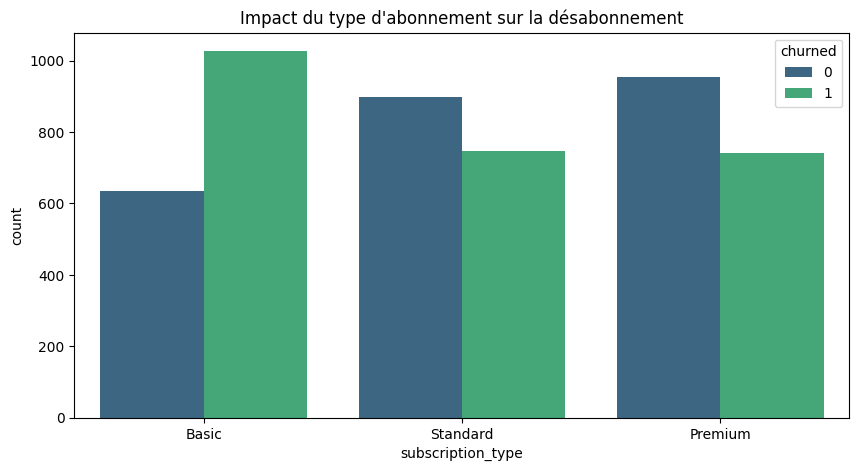

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x='subscription_type', hue='churned', data=df, palette='viridis')
plt.title('Impact du type d\'abonnement sur la désabonnement')
plt.show()

On constate que le forfait **"Basic"** de Netflix connait un **nombre de resiliation plus élevé** comparé aux autres forfaits : "Standard" et "Premium". Le forfait "Basic" est pourtant celui le moins cher avec 7,99€ mais c'est celui qui pousse de nombreux clients de Netflix à résilier leur abonnement. Comment cela pourrait-il s'expliquer? En analysant les services de chaque forfaits, on peut constate que le forfait "Basic" inclut des **publicités**, c'est là sa seule différence avec le forfait "Standard" qui est à 14,99€. ce qui pousserait les clients du forfait "Basic" a résilié si fortement c'est le fait que les publicités gachent l'expérience utilisateur. Les clients Premium, malgré un coût de 17,99€, affichent une plus grande fidélité. Cela suggère que **Netflix réussit mieux à retenir ses clients "haut de gamme"** qui consomment probablement plus de contenus et utilisent plus de profils.

In [7]:
import pandas as pd
df = pd.read_csv('/content/netflix_customer_churn.csv')
print(df.groupby('subscription_type')['churned'].mean() * 100)

subscription_type
Basic       61.830223
Premium     43.709392
Standard    45.443499
Name: churned, dtype: float64


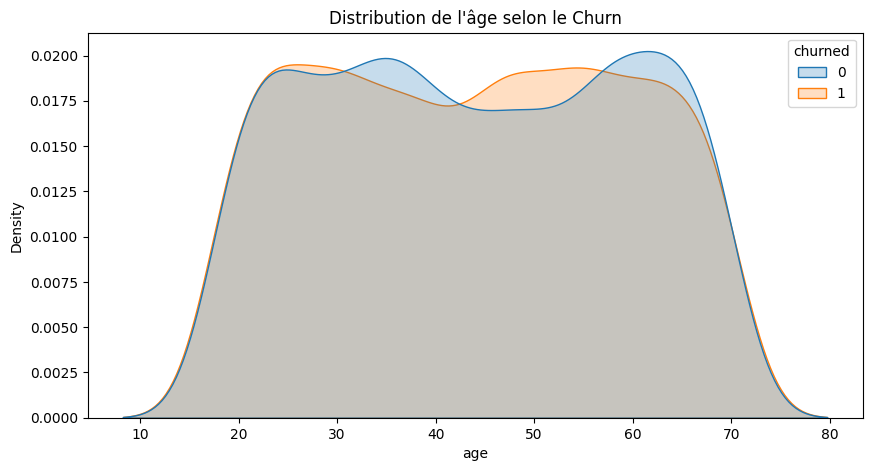

In [8]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='age', hue='churned', fill=True, common_norm=False)
plt.title('Distribution de l\'âge selon le Churn')
plt.show()

Bien que la distribution globale de l'âge semble uniforme, une analyse locale révèle une anomalie critique dans la tranche **40-55 ans**. Dans ce segment, **la densité de clients ayant résilié (aire orange) est supérieure à celle des clients restants (aire bleue)**.

Cette tranche d'âge correspond souvent à des foyers familiaux avec des enfants adolescents ou de jeunes adultes. On peut émettre l'hypothèse que le départ est lié à un changement de dynamique dans le foyer: départ des enfants, fin de l'intérêt pour certains programmes jeunesse, ou arbitrage budgétaire plus serré pour cette catégorie socio-professionnelle.

On en conclut donc que **l'âge n'est pas "neutre"**. Le modèle de Deep Learning devra capturer cette fragilité spécifique chez les quadragénaires et quinquagénaires pour prédire le risque de départ avec précision.

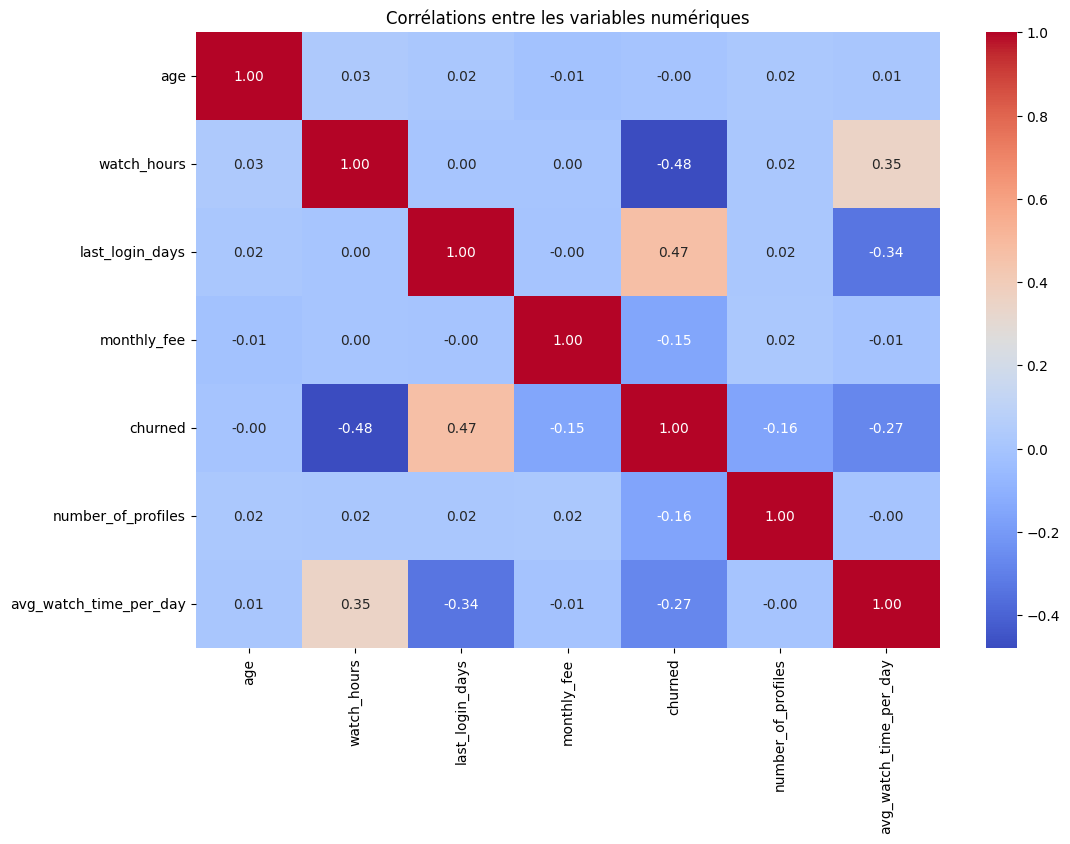

In [9]:
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélations entre les variables numériques')
plt.show()

La matrice de corrélation permet d'isoler mathématiquement les facteurs qui influencent réellement la décision de résiliation (le churned). Voici ce qu'on peut deduire de cette matrice :

* **Inactivité et désengagement (Last Login Days : +0.47)** : C'est la corrélation positive la plus élevée. Cela signifie que plus le nombre de jours depuis la dernière connexion augmente, plus le risque de départ est fort. Un client qui ne se connecte plus est un client qui a déjà "mentalement" quitté la plateforme. C'est le signal d'alarme numéro 1 que Netflix devrait surveiller.

* **L'attachement au contenu (Watch Hours : -0.48)** : C'est la corrélation négative la plus forte. Plus le volume d'heures visionnées est important, plus la probabilité de churn diminue. Cela prouve que la consommation de contenu est le meilleur rempart contre la résiliation. Un client "actif" est statistiquement un client fidèle. Cette corrélation coule de source avec la précédente.

* **Le paradoxe de l'âge (Age : 0.00)** : Mathématiquement, la corrélation est nulle. Cela ne signifie pas que l'âge n'est pas important (comme nous l'avons vu avec le pic des 40-55 ans), mais que le lien n'est pas linéaire : le churn ne monte pas ou ne descend pas de manière constante avec l'âge. Cette relation avec l'âge est bien plus complexe et est mal capté par la matrice de corrélation.

* **Facteurs secondaires (Monthly Fee & Profiles)**: Le prix (monthly_fee) et le nombre de profils (number_of_profiles) montrent une corrélation légèrement négative (environ -0.15). Cela suggère que les clients payant plus cher (Premium) ou utilisant plusieurs profils (usage familial) sont légèrement plus stables que les utilisateurs "solo" à petit budget.

In [10]:
import kagglehub

path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")
print("Path to dataset files:", path)

100%|██████████| 186k/186k [00:00<00:00, 41.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdulwadood11220/netflix-customer-churn-dataset/versions/1


In [11]:
import pandas as pd
import os

print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "netflix_customer_churn.csv"))
if "customer_id" in df.columns:
    df = df.drop(columns=["customer_id"])

print(df.head())

['netflix_customer_churn.csv']
   age  gender subscription_type  watch_hours  last_login_days   region  \
0   51   Other             Basic        14.73               29   Africa   
1   47   Other          Standard         0.70               19   Europe   
2   27  Female          Standard        16.32               10     Asia   
3   53   Other           Premium         4.51               12  Oceania   
4   56   Other          Standard         1.89               13   Africa   

   device  monthly_fee  churned payment_method  number_of_profiles  \
0      TV         8.99        1      Gift Card                   1   
1  Mobile        13.99        1      Gift Card                   5   
2      TV        13.99        0         Crypto                   2   
3      TV        17.99        1         Crypto                   2   
4  Mobile        13.99        1         Crypto                   2   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1          

region
Africa           48.318804
Asia             50.653983
Europe           51.672434
North America    49.471210
Oceania          50.065359
South America    51.431844
Name: churned, dtype: float64


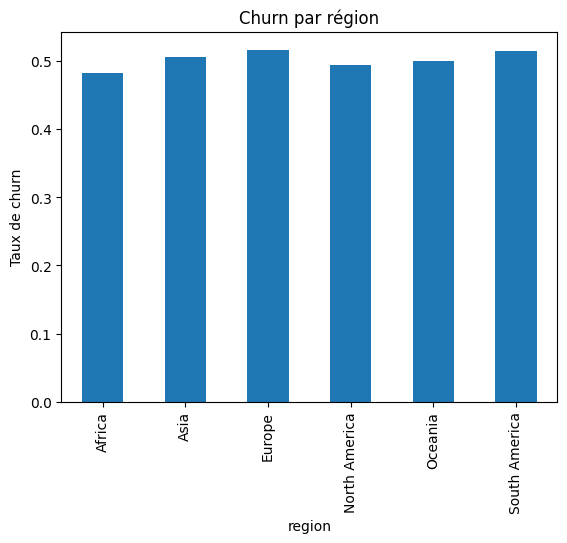

In [12]:
print(df.groupby('region')['churned'].mean() * 100)

df.groupby('region')['churned'].mean().plot(kind='bar')
plt.title("Churn par région")
plt.ylabel("Taux de churn")
plt.show()

device
Desktop    49.209694
Laptop     51.789264
Mobile     50.498008
TV         49.949648
Tablet     50.000000
Name: churned, dtype: float64


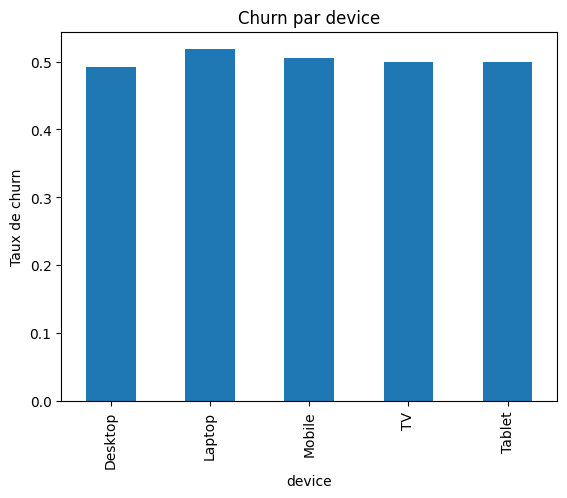

In [13]:
print(df.groupby('device')['churned'].mean() * 100)

df.groupby('device')['churned'].mean().plot(kind='bar')
plt.title("Churn par device")
plt.ylabel("Taux de churn")
plt.show()

payment_method
Credit Card    43.576567
Crypto         59.698492
Debit Card     43.689320
Gift Card      57.786885
PayPal         47.076023
Name: churned, dtype: float64


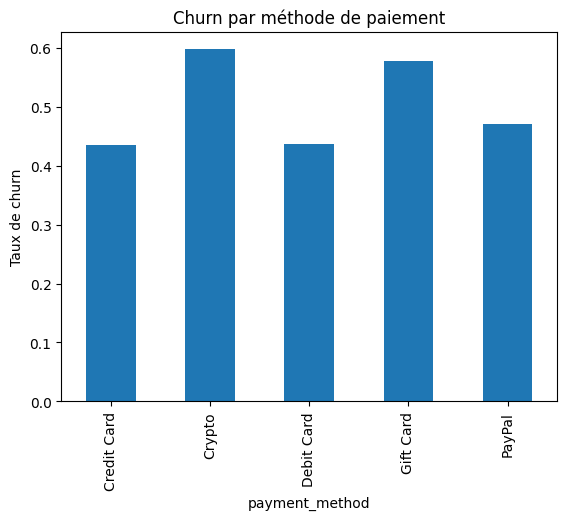

In [14]:
print(df.groupby('payment_method')['churned'].mean() * 100)

df.groupby('payment_method')['churned'].mean().plot(kind='bar')
plt.title("Churn par méthode de paiement")
plt.ylabel("Taux de churn")
plt.show()

Analyse des résultats

* L’analyse des taux de churn par région montre que les proportions sont très proches les unes des autres, toutes autour de 50 %. L’écart maximal observé est d’environ 3 points entre l’Afrique (48.3 %) et l’Europe (51,7 %). Ces différences restent faibles et ne permettent pas de conclure à un effet géographique significatif sur le churn.

* Concernant le type d’appareil, la situation est similaire. Les taux de churn varient légèrement entre Desktop (~9 %), Laptop (52 %), Mobile (50 %), TV (50 %) et Tablet (~0 %). Là encore, les écarts sont faibles, ce qui suggère que le support utilisé pour accéder au service n’influence pas fortement la probabilité de résiliation.

* En revanche, l’analyse par méthode de paiement révèle une différence beaucoup plus marquée. Les utilisateurs payant par carte bancaire (Credit Card ou Debit Card) présentent un taux de churn autour de 44 %, tandis que ceux utilisant des Gift Cards (~58 %) ou des paiements en Crypto (~60 %) affichent un taux nettement plus élevé. L’écart atteint ici environ 15 points, ce qui constitue un signal significatif.

Contrairement aux variables comportementales (watch_hours), ces critères sociogéographiques ne semblent pas être des déclencheurs directs de résiliation chez les clients Netflix. Nous les conservons néanmoins pour la phase de modélisation afin de permettre au réseau de neurones de détecter d'éventuelles corrélations croisées.

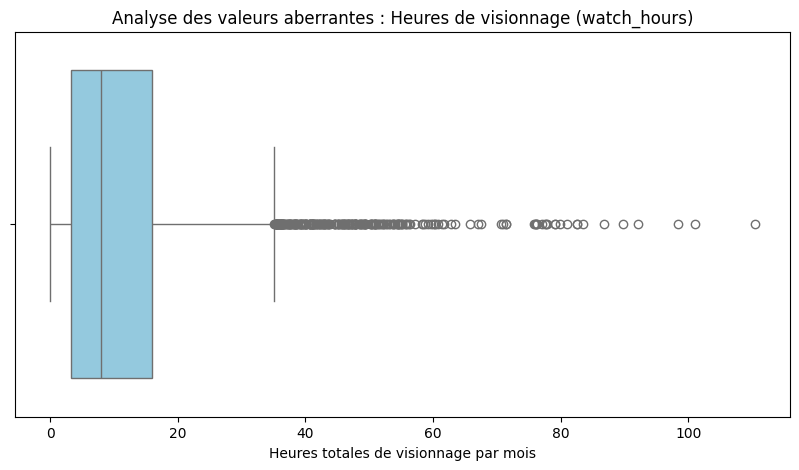

Seuil statistique des outliers : 35.07 heures
Nombre de clients au-dessus du seuil : 238


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement
df = pd.read_csv('netflix_customer_churn.csv')

# Création du boxplot pour les heures de visionnage
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['watch_hours'], color='skyblue')
plt.title('Analyse des valeurs aberrantes : Heures de visionnage (watch_hours)')
plt.xlabel('Heures totales de visionnage par mois')
plt.show()

# Calcul mathématique des bornes (Méthode de l'IQR)
Q1 = df['watch_hours'].quantile(0.25)
Q3 = df['watch_hours'].quantile(0.75)
IQR = Q3 - Q1
borne_haute = Q3 + 1.5 * IQR

print(f"Seuil statistique des outliers : {borne_haute:.2f} heures")
print(f"Nombre de clients au-dessus du seuil : {len(df[df['watch_hours'] > borne_haute])}")